In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import pickle
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InterferogramOntoAlpha

In [2]:
%cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0914_16 Faraday"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0914_16 Faraday


In [3]:
B0fn="s0914_16_124930_c1.png"
B1fn="s0914_16_124854_c2.png"
S0fn="s0914_16_130856_c1.png"
S1fn="s0914_16_130820_c2.png"
s=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-1)

<IPython.core.display.Javascript object>


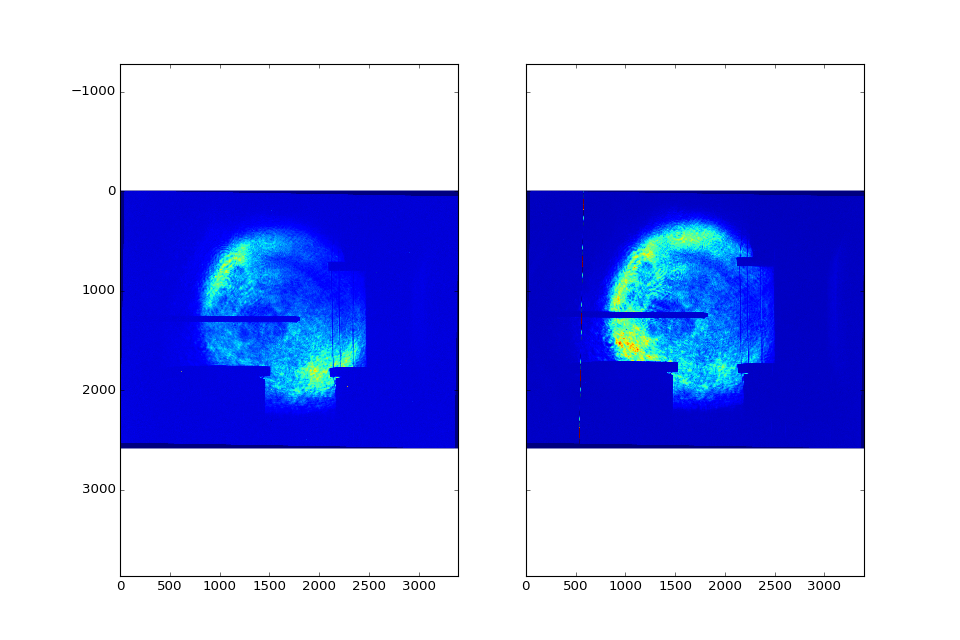

In [4]:
fig, ax=plt.subplots(1,2,sharex=True, sharey=True,figsize=(12,8))
ax[0].imshow(s.R0, clim=[0,0.1])
ax[1].imshow(s.R1, clim=[0,0.1])

In [4]:
constraints={'angle':(0,0.1),'scale':(1,0.1),'tx':(20,100),'ty':(50,100)}
t=pickle.load(open("s0919_16 faraday registration.p", "rb"))

In [5]:
s.register(constraints=constraints, transform=t)
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:124: RuntimeWarning: invalid value encountered in true_divide
  self.N0=self.S0/self.B0
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:125: RuntimeWarning: invalid value encountered in true_divide
  self.N1=self.ST/self.BT
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:129: RuntimeWarning: invalid value encountered in arcsin
  self.data=(180/np.pi)*0.5*np.arcsin(self.diff*np.tan(beta)/2.0)


<IPython.core.display.Javascript object>


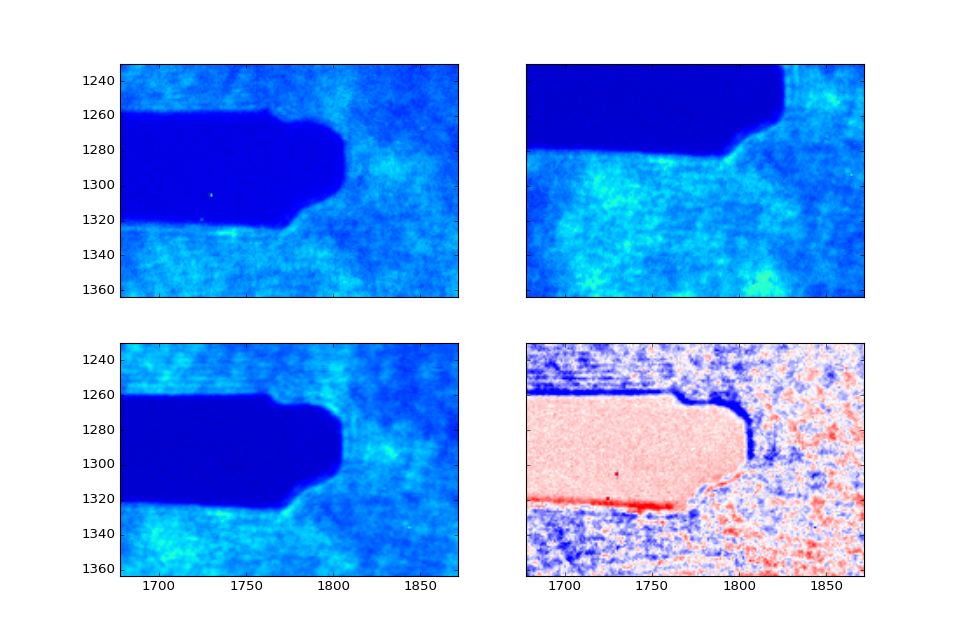

In [6]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(s.R1, clim=[0,0.1])
ax[1,0].imshow(s.RT, clim=[0,0.1])
ax[1,1].imshow(s.R0-s.RT, clim=[-0.01,0.01], cmap='bwr')

<IPython.core.display.Javascript object>


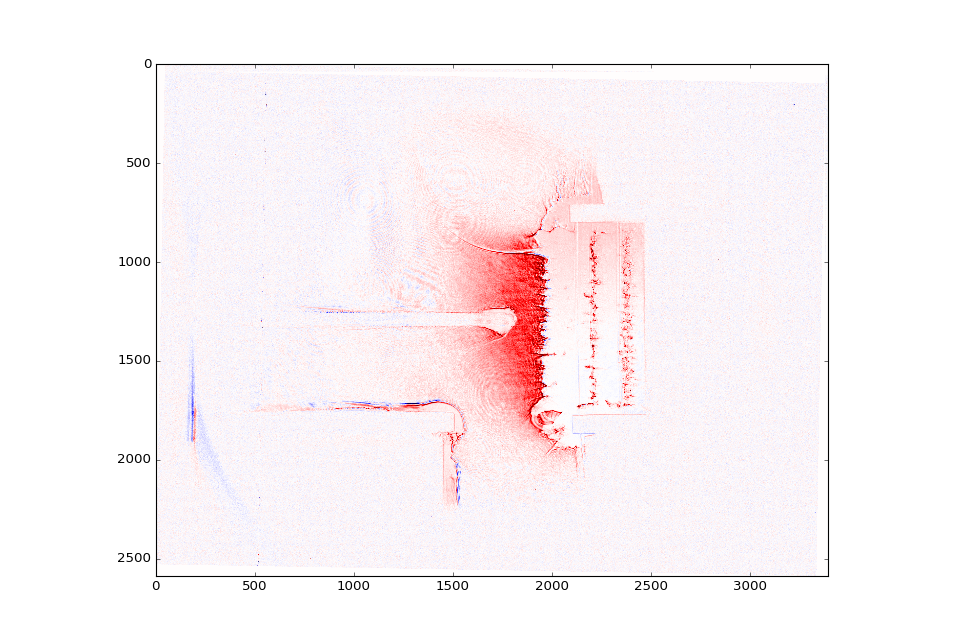

In [7]:
s.plot_data_px(clim=[-3,3])

In [6]:
s.scale=59.5
s.set_origin((1289,1803), extent=[-13,13,-20,20])

<IPython.core.display.Javascript object>


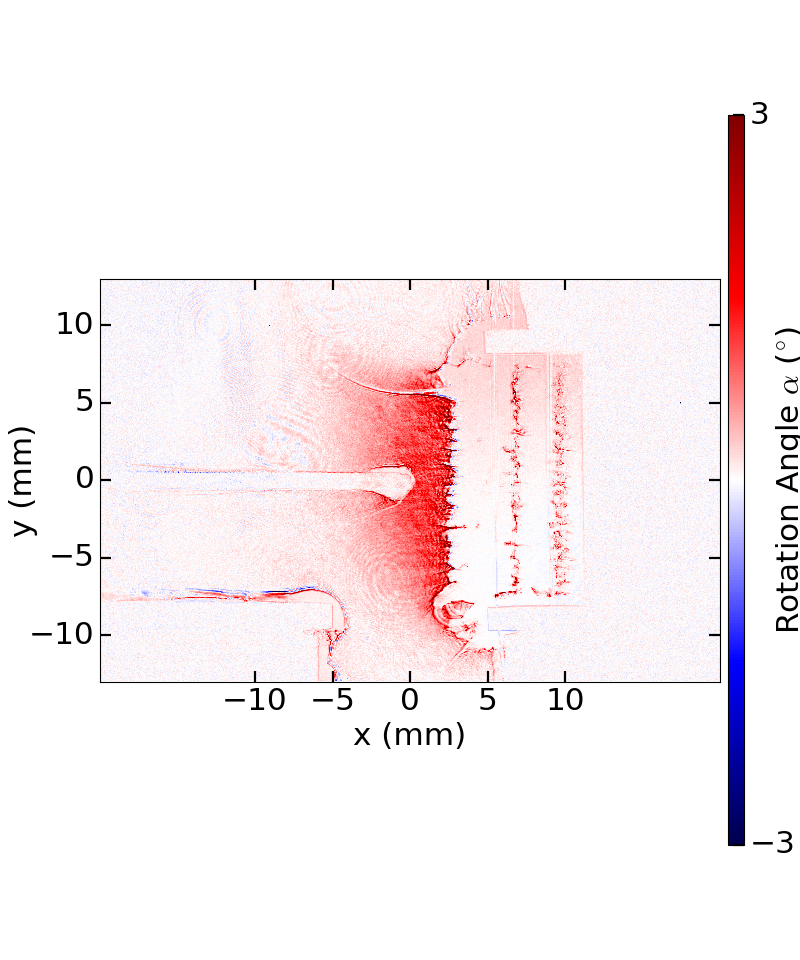

In [7]:
cm=3

fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-cm,cm])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,cm])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [15]:
fig.savefig('s0914_16 polarogram.png', dpi=600, bbox_inches='tight')

# Overlay Interferometry

In [15]:
I0fn="s0909_16 IR side on interferometry (1).JPG"
I1fn="s0909_16 IR side on interferometry (2).JPG"
IO=InterferogramOntoAlpha(s, I0fn, I1fn)

NameError: name 'IO' is not defined

In [22]:
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
t=pickle.load( open( "s0919_16 interferometry registration.p", "rb" ) )

In [23]:
IO.register(constraints=constraints, transform=t)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [28]:
IO.transform

{'Dangle': 0.013243084167157151,
 'Dscale': 0.00037280836448168683,
 'Dt': 0.25,
 'angle': 0.0324549001012997,
 'scale': 0.69717753165493668,
 'success': 0.0068316718606273941,
 'timg': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'tvec': array([-39.80366218,  46.04228613])}

<IPython.core.display.Javascript object>


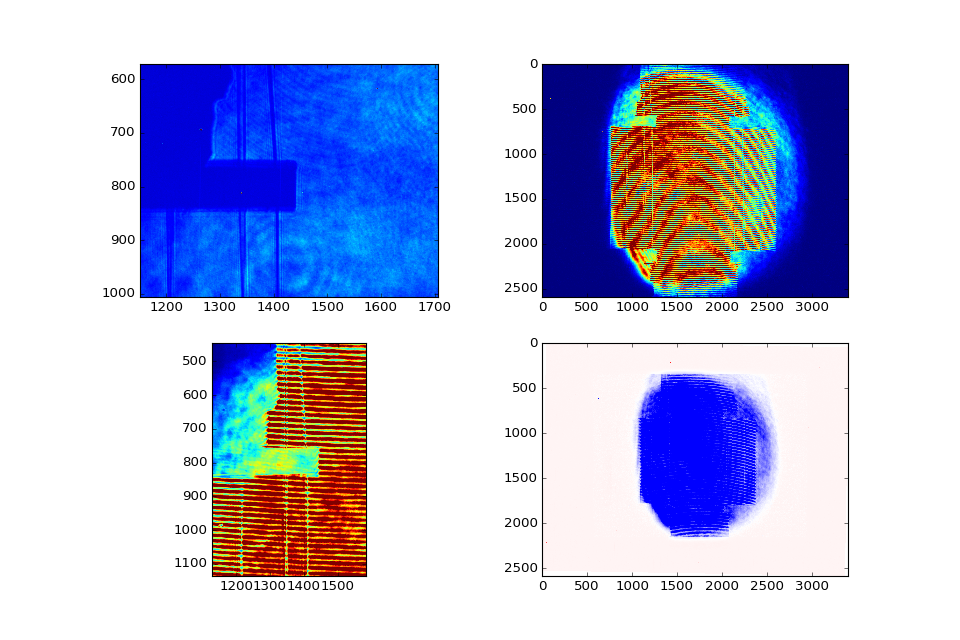

In [25]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(IO.I0zcn, clim=[0,0.5])
ax[1,0].imshow(IO.transform['timg'], clim=[0,0.5])
ax[1,1].imshow(s.R0-IO.transform['timg'], clim=[-0.2,0.2], cmap='bwr')

<IPython.core.display.Javascript object>


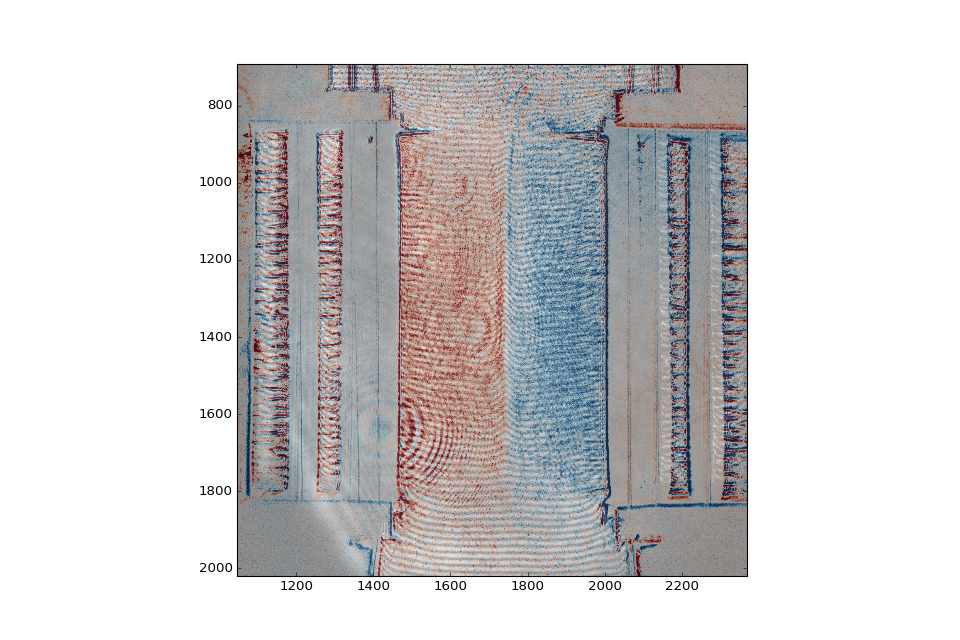

In [26]:
IO.plot_overlay_px(transparency=0.4, clim=[-0.5,0.5])

In [42]:
IO.scale=s.scale
IO.set_origin(s.origin, extent=[-13,13,-11,11])

<IPython.core.display.Javascript object>


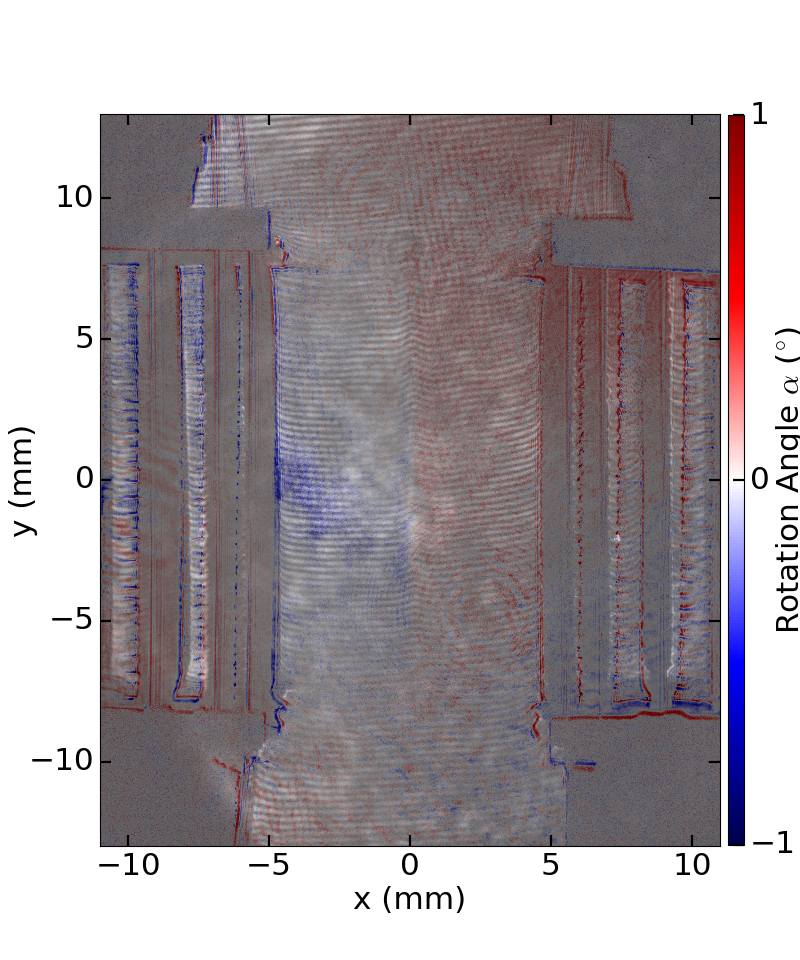

In [45]:
fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-1,1])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.imshow(IO.data_c, cmap='gray', alpha=0.6, extent=s.extent)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)


In [52]:
fig.savefig('s0830_16 polarogram w interferometry.png', dpi=300, bbox_inches='tight')

(773, 476) (773, 833)


<IPython.core.display.Javascript object>


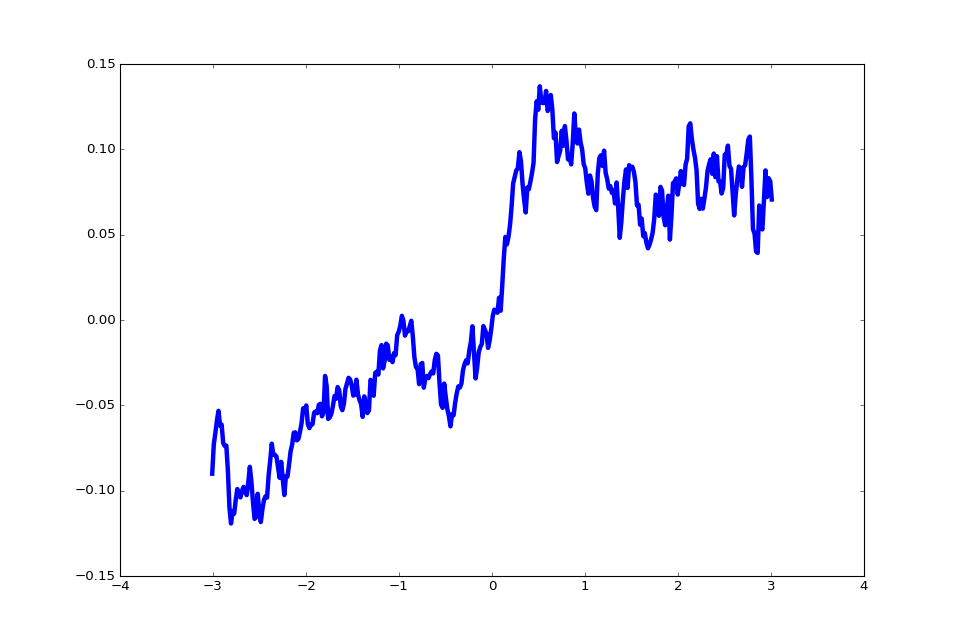

In [27]:
yy=0
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)
fig, ax=plt.subplots(figsize=(12,8))
s.plot_lineout(ax=ax, label='Data')


# Bring in The Density Map

In [8]:
I0fn="s0914_16 IR interferometry bk.JPG"
nefn="s0914_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
#t1=pickle.load( open( "s0919_16 interferometry registration.p", "rb" ) )

In [9]:
b.register(constraints=constraints)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


In [18]:
b.pickle_transform(fn=b.fn[:8]+' interferometry registration.p')

<IPython.core.display.Javascript object>


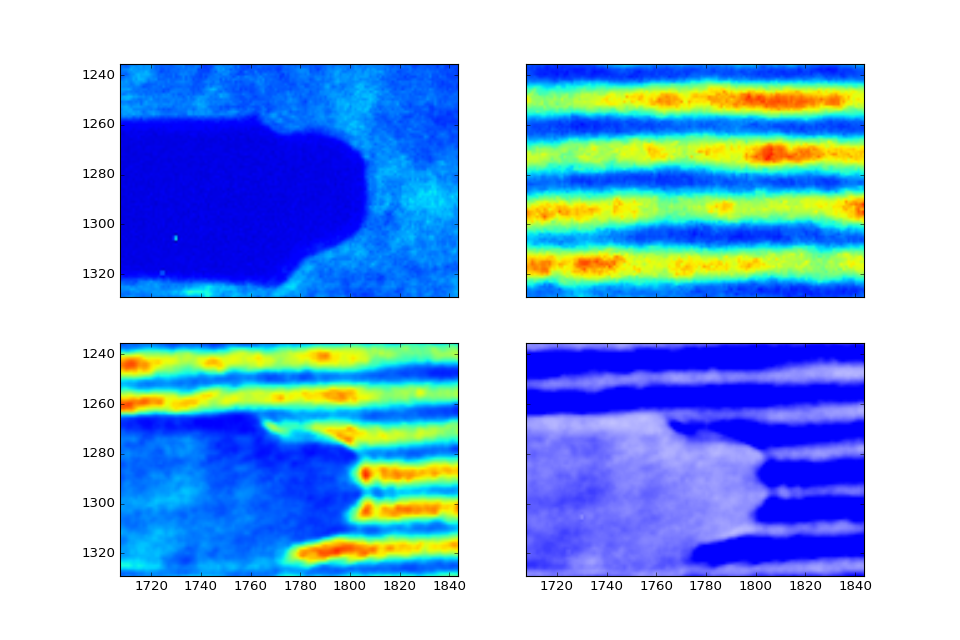

In [12]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(b.I0zcn, clim=[0,0.5])
ax[1,0].imshow(b.I0T, clim=[0,0.5])
ax[1,1].imshow(s.R0-b.I0T, clim=[-0.2,0.2], cmap='bwr')

In [72]:
b.scale=s.scale
b.set_origin(s.origin, extent=[-13,13,-11,11])

<IPython.core.display.Javascript object>


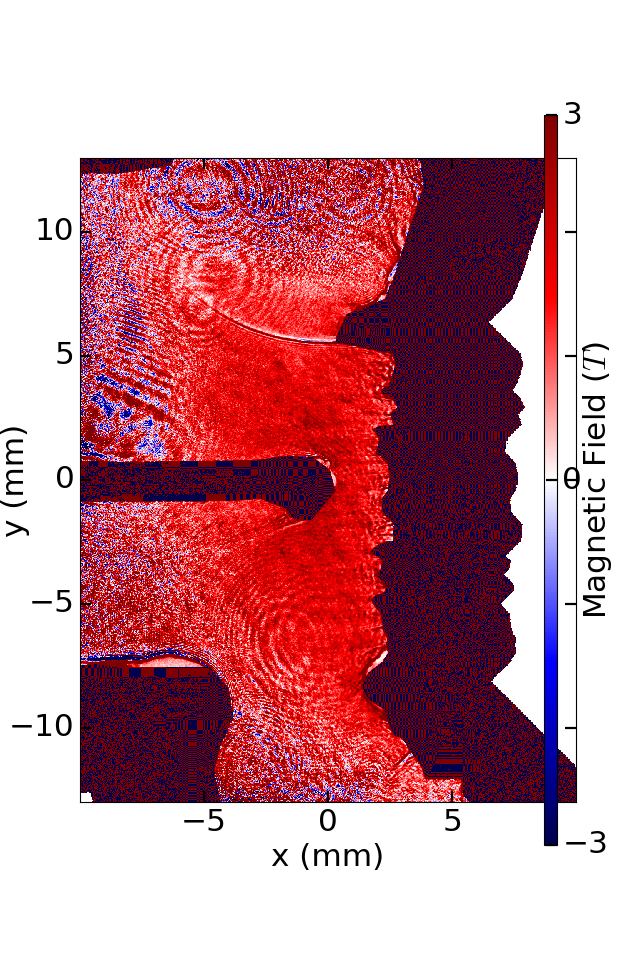

In [71]:
cm=3

fig, ax=plt.subplots(figsize=(8,12))
far=b.plot_data_mm(ax=ax, clim=[-cm,cm])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-5,0,5])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.85, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,0,cm])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [21]:
fig.savefig('s0914_16 B field.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


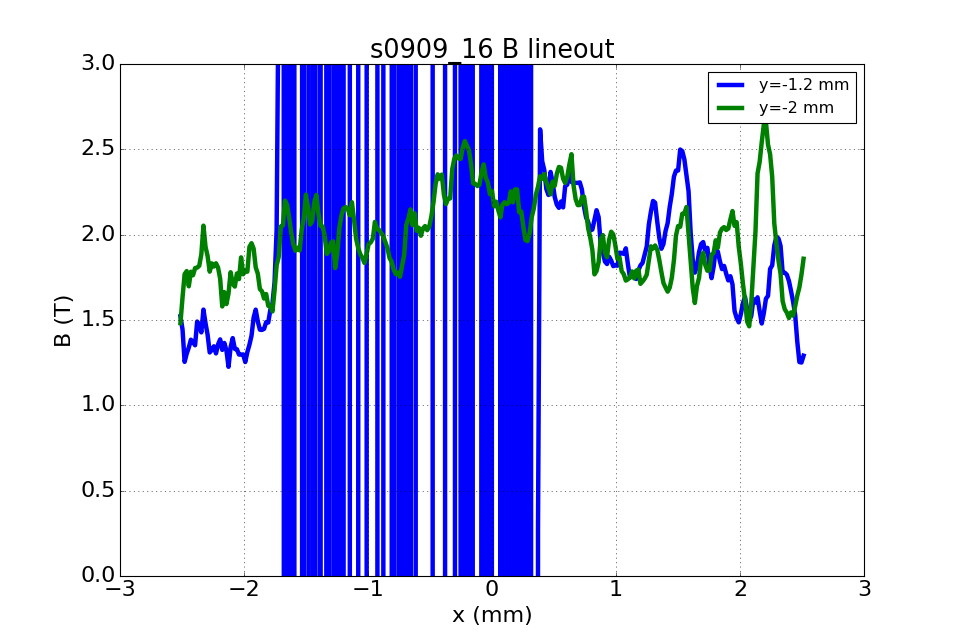

(844, 178) (844, 476)
(892, 178) (892, 476)


In [22]:
fig, ax=plt.subplots(figsize=(12,8))

yy=-1.2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-1.2 mm')

yy=-2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-2 mm')


ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([0,3])
ax.set_ylabel('B (T)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('s0909_16 B lineout', fontsize=23)

ax.grid(True)
ax.legend()

In [39]:
fig.savefig('s0914_16 B field lineouts.png', dpi=300, bbox_inches='tight')

# Abel Inversion

In [23]:
#create an NelMap2 object but then replace the data with the image registered electron density.
s0914_16=NeLMap2('s0914_16 IR neL.txt', scale=97)

In [25]:
n=s0914_16
n.data=b.I1T
n.scale=b.scale
n.set_origin(b.origin, extent=[-13,13,-20,20])

<IPython.core.display.Javascript object>


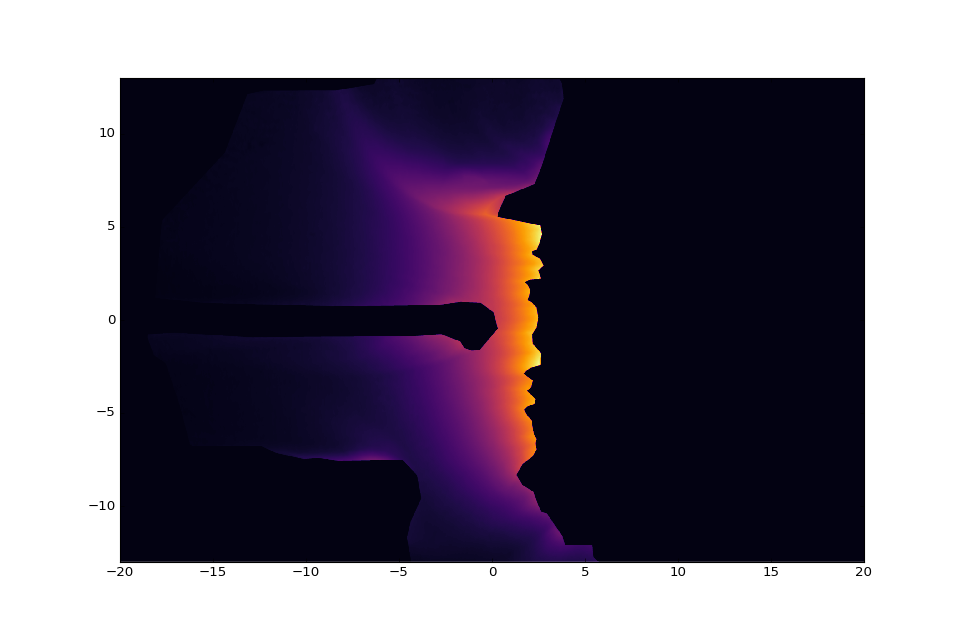

In [26]:
n.plot_data_mm()

(1071, 148) (1071, 1297)


<IPython.core.display.Javascript object>


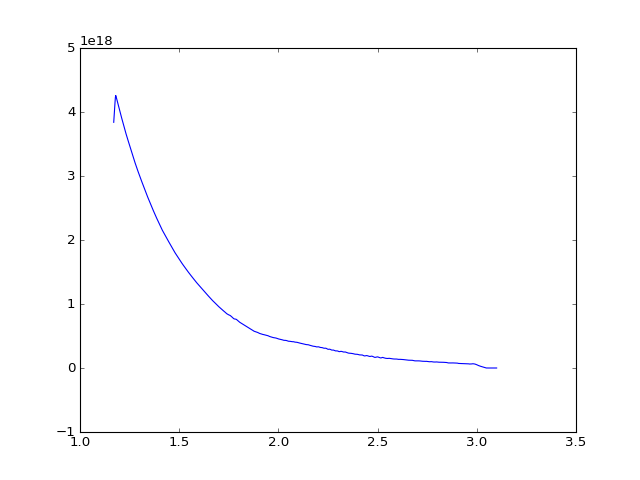

In [62]:
yy=-5
x0=-17.5
x1=1.8
w=2
n.create_lineout(start=(yy,x0), end=(yy,x1), lineout_width=w*s.scale)

xc=13.5 #add 13.5 mm to shift origin
x=np.linspace(-x0+13.5,-x1+13.5, n.lo.size)*1e-1 #mm to cm
x=x[::-1]
neL=n.lo[::-1]
dx=x[1]-x[0]
neL_dx=np.gradient(neL, dx)

fig,ax=plt.subplots()
ax.plot(x, neL)

In [63]:
def f(r, dfdx, x):
    j=np.where(r<x)[0][0]
    d=dfdx[j:]
    xx=x[j:]
    i=d/(xx**2-r**2)**0.5
    return -1/np.pi*np.trapz(i,x=xx)

In [64]:
ne_r=np.array([f(rr, neL_dx, x) for rr in x[:-1]])

<IPython.core.display.Javascript object>


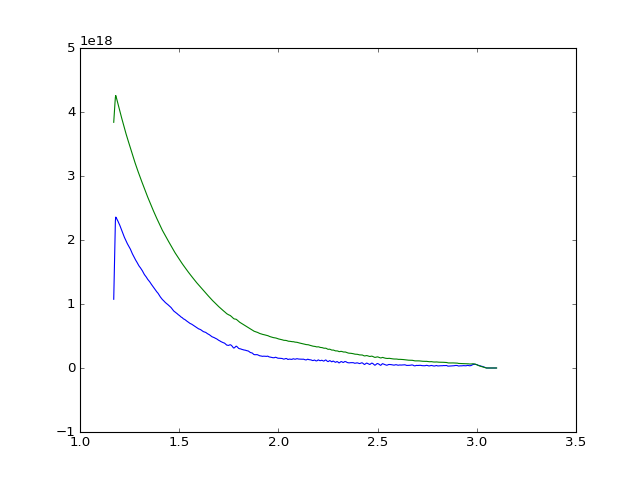

In [65]:
fig,ax=plt.subplots()
ax.plot(x[:-1], ne_r)
ax.plot(x, neL)

(1071, 148) (1071, 1297)


<IPython.core.display.Javascript object>


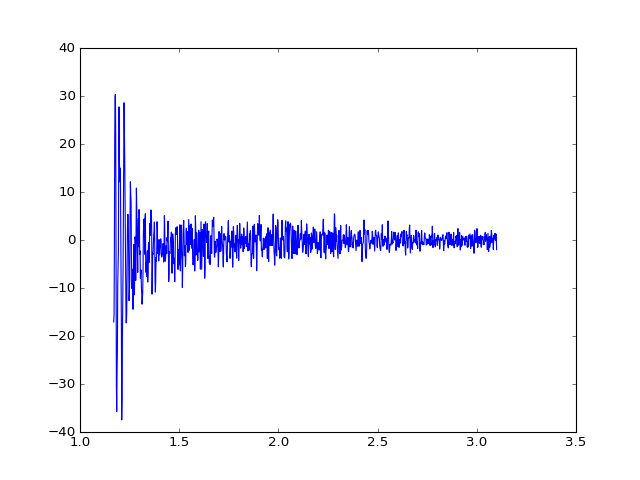

In [66]:
s.create_lineout(start=(yy,x0), end=(yy,x1), lineout_width=w*s.scale)

alpha=s.lo[::-1]
dx=x[1]-x[0]
alphax_dx=np.gradient(alpha/x, dx)

fig,ax=plt.subplots()
ax.plot(x, alphax_dx)

<IPython.core.display.Javascript object>


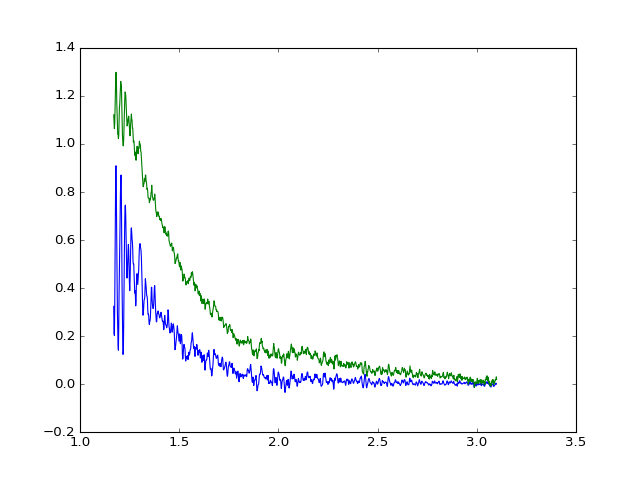

In [67]:
f_r=np.array([f(rr, alphax_dx, x) for rr in x[:-1]])

fig,ax=plt.subplots()
ax.plot(x[:-1], f_r)
ax.plot(x, alpha)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


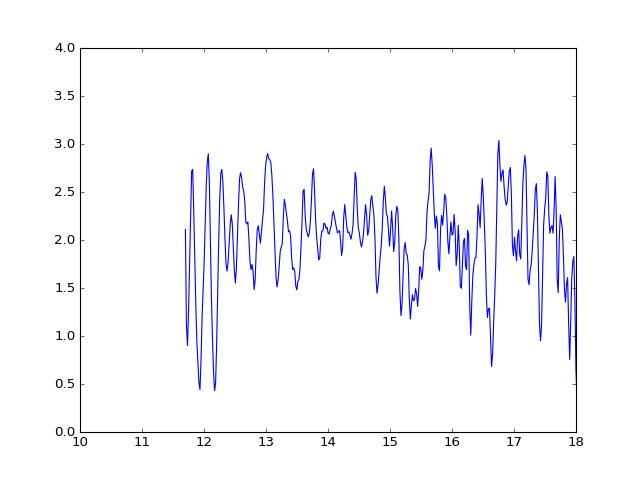

(10, 18)

In [68]:
B=5.99e18*f_r*x[:-1]/ne_r

fig,ax=plt.subplots()
ax.plot(x[:-1]*10, B)
ax.set_ylim([0,4])
ax.set_xlim([10,18])

<IPython.core.display.Javascript object>


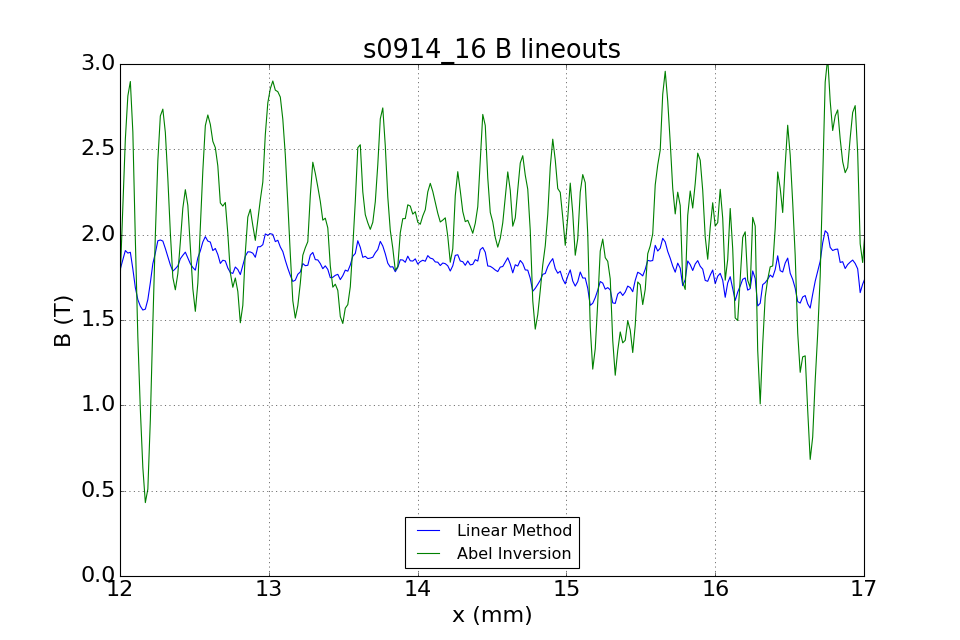

(1071, -386) (1071, 761)


In [90]:
fig, ax=plt.subplots(figsize=(12,8))

b.create_lineout(start=(yy,x0), end=(yy,x1), lineout_width=w*s.scale)

ax.plot(x[:-2]*10, b.lo[::-1], label='Linear Method')
ax.plot(x[:-1]*10, B, label='Abel Inversion')

ax.set_xlim([12,17])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([0,3])
ax.set_ylabel('B (T)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('s0914_16 B lineouts', fontsize=23)

ax.grid(True)
ax.legend(loc=8)

In [91]:
fig.savefig('s0914_16 B field lineouts abel.png', dpi=300, bbox_inches='tight')

In [85]:
x.shape

(1150,)

In [78]:
x

array([ 1.17      ,  1.17167972,  1.17335944, ...,  3.09664056,
        3.09832028,  3.1       ])